In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [138]:
app_data=pd.read_csv(r"C:\Users\DELL\Downloads\apps.csv (1)\apps.csv")
app_data.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [139]:
app_data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [140]:
app_data.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


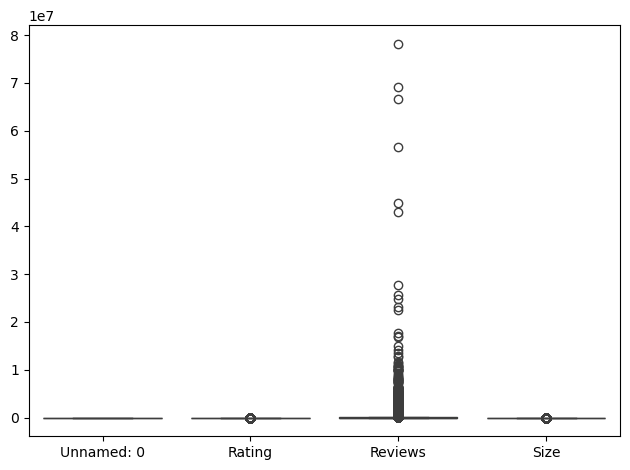

In [141]:
sns.boxplot(app_data)
plt.tight_layout()
plt.show()

In [142]:
chars_remove=['+',',','$']
cols_clean=['Installs','Price']
for col in cols_clean:
    for char in chars_remove:
        app_data[col]=app_data[col].astype(str).str.replace(char,'')
    app_data[col]=pd.to_numeric(app_data[col])

In [143]:
app_data[['Rating','Size']]=app_data[['Rating','Size']].fillna(np.mean(app_data['Rating']))

In [144]:
app_data[['Current Ver','Android Ver']]=app_data[['Current Ver','Android Ver']].fillna('NaN')

In [145]:
app_data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Exploring app categories

In [146]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [147]:
apps_in_category=app_data['Category'].value_counts().sort_values(ascending=False)

In [148]:
num_category=len(app_data['Category'].unique())
num_category

33

In [149]:
data=[go.Bar(x=apps_in_category.index,y=apps_in_category.values)]
plotly.offline.iplot(data)

Distribution of app ratings

In [150]:
app_data['Rating'].mean()

4.173243045387995

In [151]:
data1=[go.Histogram(x=app_data['Rating'])]
plotly.offline.iplot(data1)


Size and price of an app

In [172]:
apps_with_size_and_rating_present = app_data[(~app_data['Rating'].isnull()) & (~app_data['Size'].isnull())]

In [173]:
large_categories=app_data[['Size','Rating']].groupby(app_data['Category']).filter(lambda x:len(x)>=250).reset_index()

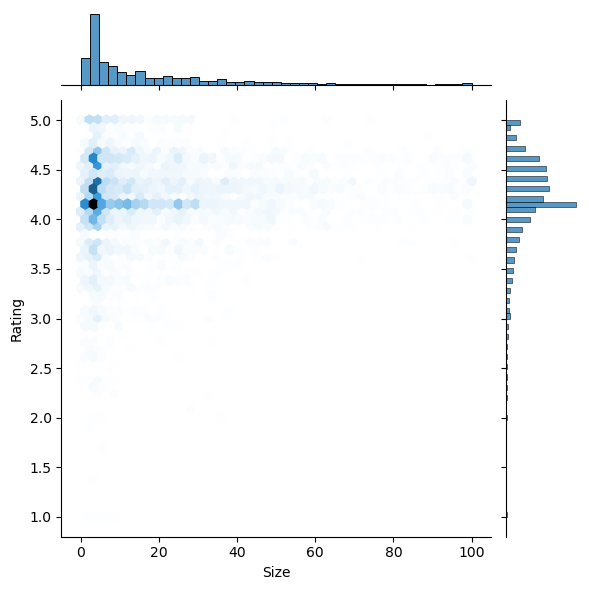

In [174]:
sns.jointplot(x=large_categories['Size'],y=large_categories['Rating'],kind='hex')
plt.show()

In [175]:
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

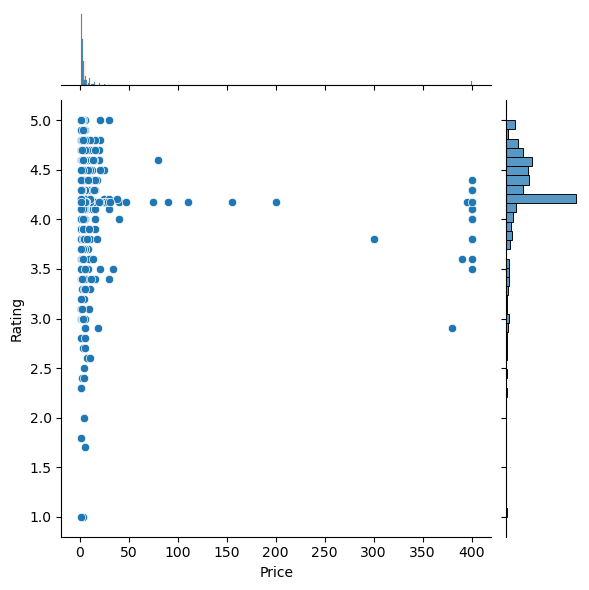

In [176]:
sns.jointplot(x=paid_apps['Price'],y=paid_apps['Rating'])